In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/cluster_blobs.csv")

In [3]:
df.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

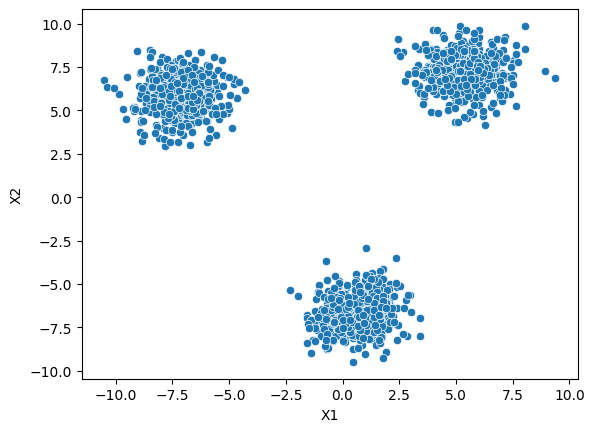

In [4]:
 sns.scatterplot(data=df, x='X1', y='X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

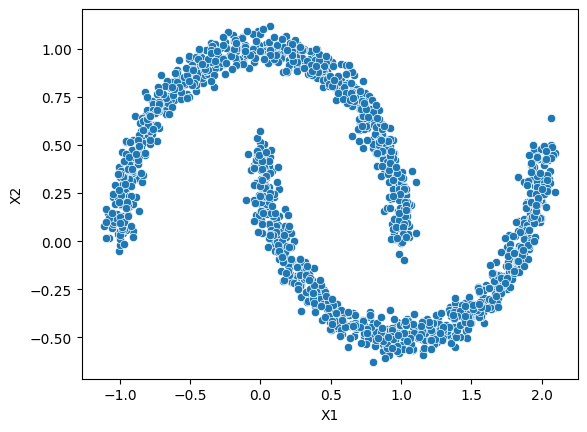

In [7]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [8]:
circles = pd.read_csv("../DATA/cluster_circles.csv")

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

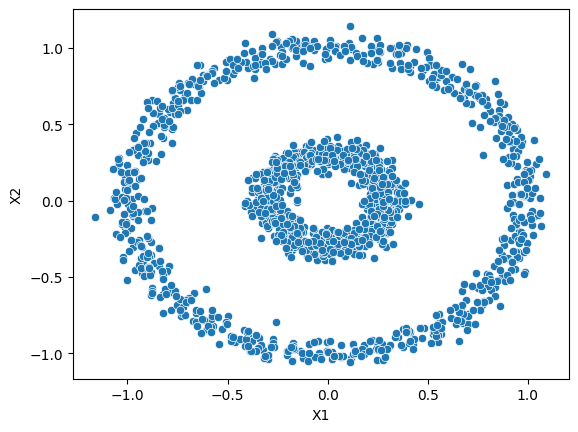

In [10]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [11]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [12]:
from sklearn.cluster import KMeans

In [25]:
KMeans_model1 = KMeans(n_clusters=3)

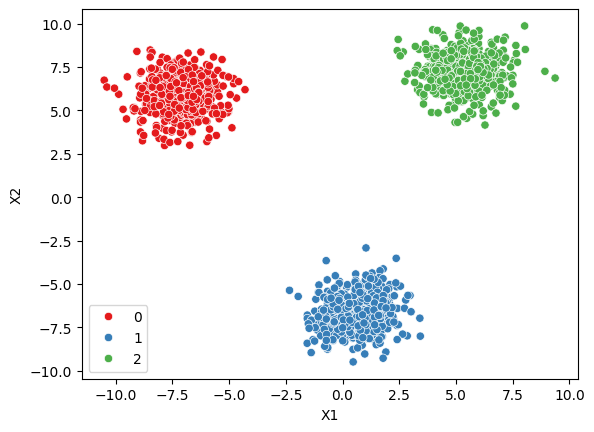

In [26]:
display_categories(KMeans_model1, df)

In [35]:
KMeans_model2 = KMeans(n_clusters=2)

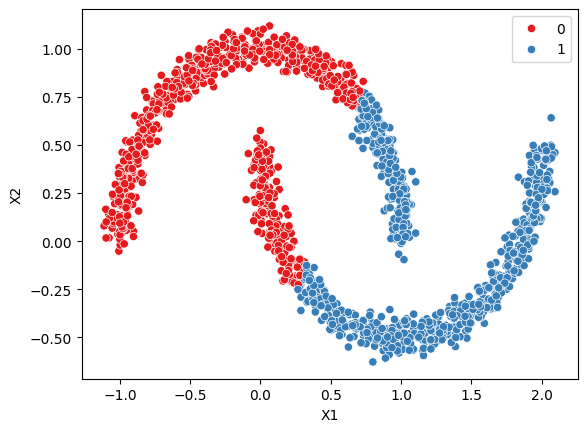

In [36]:
display_categories(KMeans_model2, moons)

In [37]:
KMeans_model3 = KMeans(n_clusters=2)

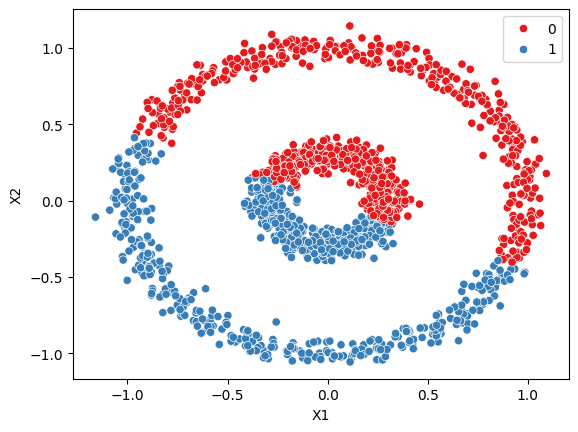

In [38]:
display_categories(KMeans_model3, circles)

In [39]:
from sklearn.cluster import DBSCAN

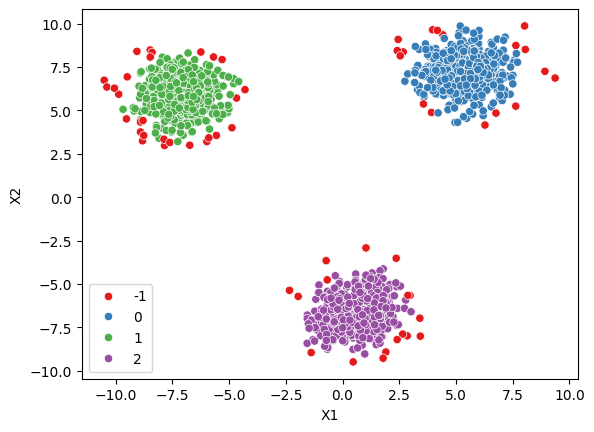

In [41]:
dbscan_model1 = DBSCAN()
display_categories(dbscan_model1, df)

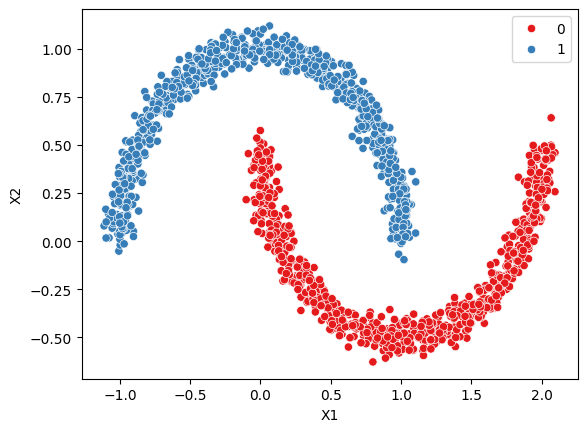

In [63]:
dbscan_model2 = DBSCAN(eps=0.16)
display_categories(dbscan_model2, moons)

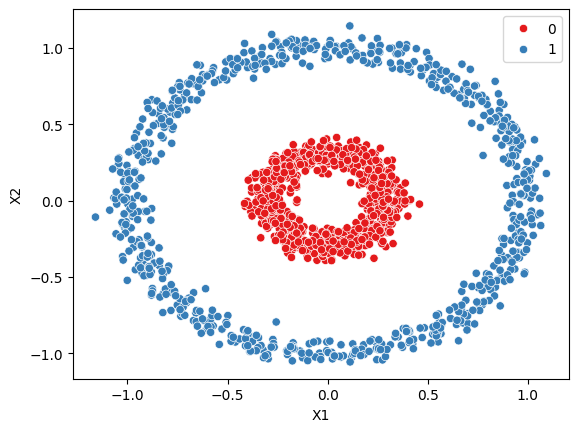

In [52]:
dbscan_model3 = DBSCAN(eps=0.15)
display_categories(dbscan_model3, circles)

In [53]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [54]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

In [55]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [56]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

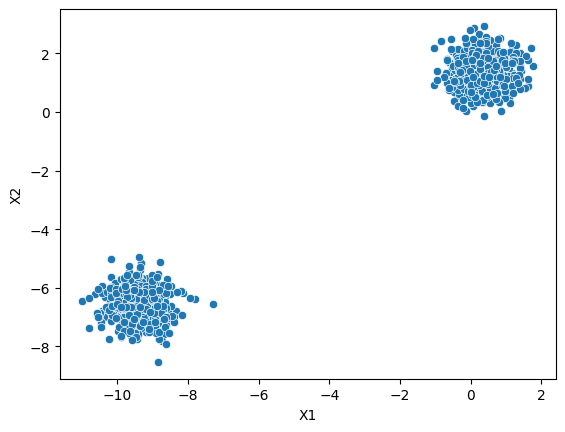

In [57]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

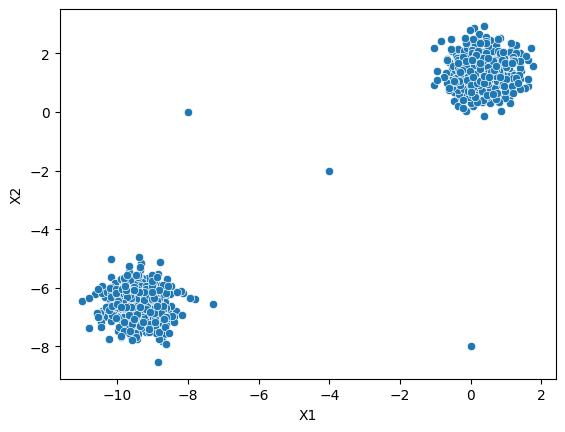

In [58]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [59]:
dbscan = DBSCAN()

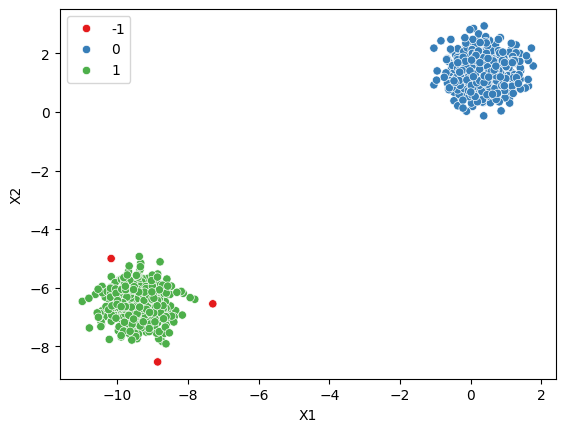

In [60]:
display_categories(dbscan, two_blobs)

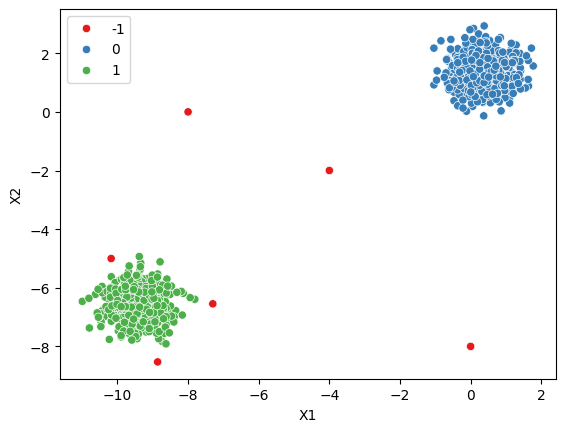

In [61]:
display_categories(dbscan, two_blobs_outliers)

In [65]:
# Total Outliers Found
np.sum(dbscan.labels_ == -1)

np.int64(6)

In [67]:
# Total Clusters
len(np.unique(dbscan.labels_))

3

In [68]:
# Total percent of outliers
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

np.float64(0.5982053838484547)

In [70]:
outlier_percent = []
number_of_outliers = []
total_cluster = []

for eps in np.linspace(0.001, 1, 100):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)

    # Total Outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # Percent of points classified as outliers
    perc_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outlier)

    # Total clusters
    total_cluster.append(len(np.unique(dbscan.labels_)))

<Axes: >

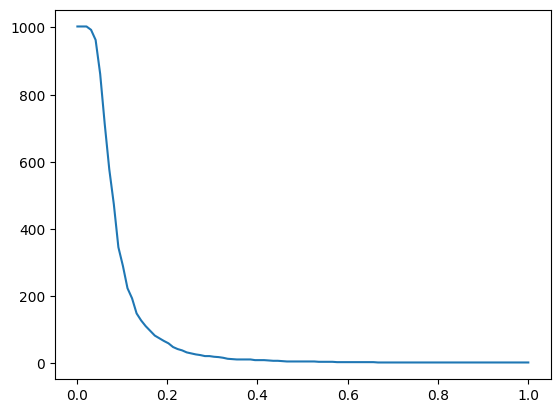

In [73]:
sns.lineplot(x=np.linspace(0.001, 1, 100), y=number_of_outliers)
# plt.xlim(0,0.5)